 ***Titanic Survival Prediction***

 *Predict whether a passenger survived the Titanic sinking.*

# Step 1 : Load the dataset

## import the library.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 : Load the data.

In [5]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Step -2 : EDA

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## show how many survived

In [9]:
import seaborn as sns

<Figure size 640x480 with 0 Axes>

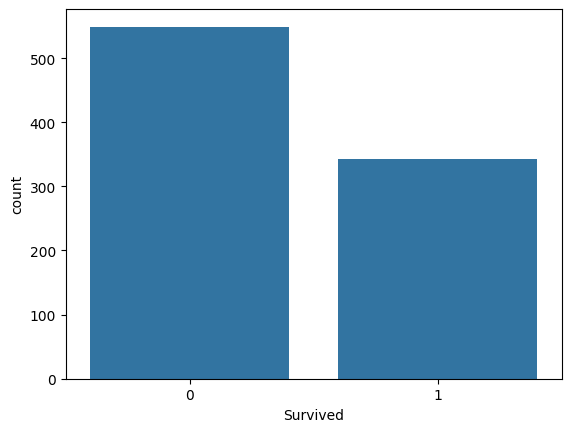

<Figure size 640x480 with 0 Axes>

In [10]:
sns.countplot(x='Survived',data=df)
plt.figure()


📌 **Explanation:** More people did not survive (0) than those who did (1).

## Survival by gender

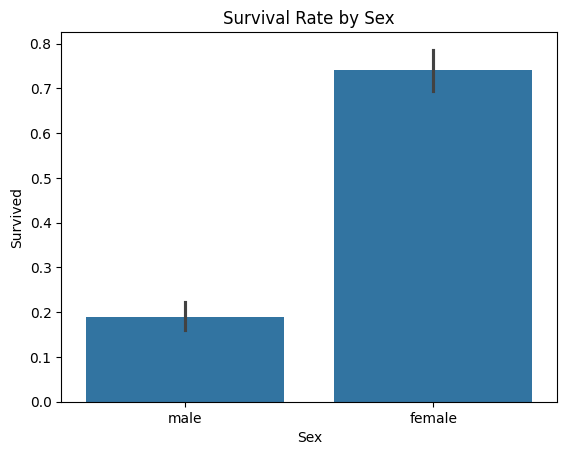

In [11]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

📌 **Explanation:** Females had a much higher chance of survival compared to males.

## Age distribution

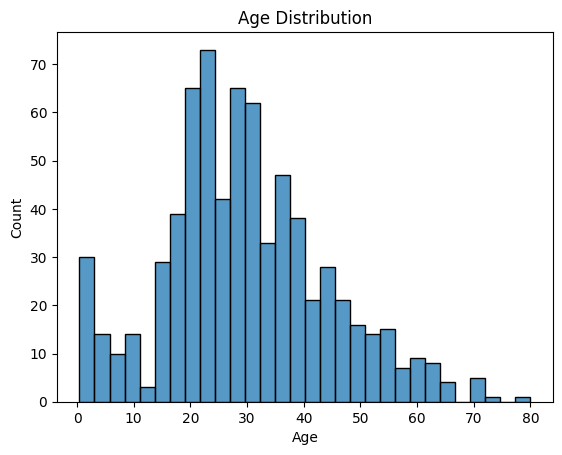

In [12]:
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()


📌 **Explanation:** Most passengers were between 20 and 40 years old.

### Survival by Age Group

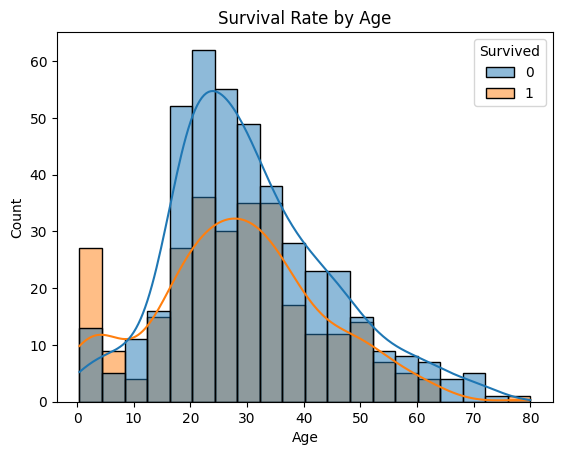

In [13]:
sns.histplot(data = df, x = 'Age', hue = 'Survived', kde = True)
plt.title('Survival Rate by Age')
plt.show()

📌 **Explanation:** Young children had a better survival rate. Older passengers had a lower chance.

# Step - 3 :  Feature Selection & Preprocessing

## 3.1 : Drop columns that are likely not useful

In [14]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
len(df)

891

In [17]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


## fill age null value using median.

In [18]:
df['Age'].median()

28.0

In [19]:
df['Age'].fillna(df['Age'].median(), inplace = True)

/tmp/ipython-input-3612560828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [20]:
# check for embarked
df['Embarked'].mode()[0]

'S'

In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

/tmp/ipython-input-1994620826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Step 4 : Encoding.

## we use encoding to convert into catagorical data.

In [1]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Here "SEX" and "Embarked" not contains numaric value, using levelEncoding we convert it into numaric value.

In [27]:
level_Encoder = LabelEncoder()
df['Sex'] = level_Encoder.fit_transform(df['Sex'])
df['Embarked'] = level_Encoder.fit_transform(df['Embarked'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Now we successfully encoded.

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Step 5 : Train-Test Split

## 5.1 : Features Scalling

##  Scaling features helps improve the performance of some algorithms by ensuring all features have a similar scale. We'll use `StandardScaler` to standardize the features.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

In [32]:
print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


## we can see "Survived" is successfully drop from dataframe.

In [33]:
print(Y.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## train-test our model

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
print(len(X_train))
print(len(X_test))

712
179


## Features Scales

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Convert back to DataFrame for better readability.

In [40]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [41]:
print("Scaled Training Data : ")
print(X_train.head())
print("\nScaled Testing Data : ")
print(X_test.head())

Scaled Training Data : 
     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0 -1.614136  0.724310  1.253641 -0.470722 -0.479342 -0.078684  0.563525
1 -0.400551  0.724310 -0.477284 -0.470722 -0.479342 -0.377145  0.563525
2  0.813034  0.724310  0.215086 -0.470722 -0.479342 -0.474867  0.563525
3  0.813034  0.724310 -0.246494  0.379923 -0.479342 -0.476230  0.563525
4  0.813034 -1.380624 -1.785093  2.931860  2.048742 -0.025249  0.563525

Scaled Testing Data : 
     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0  0.813034  0.724310 -0.092634  0.379923  0.784700 -0.333901 -2.025053
1 -0.400551  0.724310  0.138156 -0.470722 -0.479342 -0.425284  0.563525
2  0.813034  0.724310 -0.708074 -0.470722 -0.479342 -0.474867  0.563525
3 -0.400551 -1.380624 -1.785093 -0.470722  0.784700  0.007966  0.563525
4  0.813034 -1.380624 -1.169653  0.379923 -0.479342 -0.411002 -2.025053


In [61]:
print("Traing data shape : ", X_train_scaled.shape)
print("Testing data shape : ", X_test_scaled.shape)

Traing data shape :  (712, 7)
Testing data shape :  (179, 7)


# Step 6 : Model Selections.

## Currently we working on Catagorical data. So, we select our model according this, Logisc Regression, KNN, Decission Tree would be the best model for catagorical data.

### Train-Test on Logistic Regression.

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)

LogisticRegression()

In [65]:
predict_log = logistic_reg.predict(X_test)

In [60]:
print(predict_log)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


## Now see the Accuracy of Logistic Regression model.

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
print("Accuracy Score : ", accuracy_score(Y_test, predict_log))

Accuracy Score :  0.8044692737430168


In [51]:
print("Classification Report : \n", classification_report(Y_test, predict_log))

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



##

## Train-Test on KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, Y_train)

KNeighborsClassifier()

In [69]:
predict_knn = knn_class.predict(X_test)
print(predict_knn)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [67]:
print("Accuracy Score : ", accuracy_score(Y_test, predict_knn))

Accuracy Score :  0.8044692737430168


In [68]:
print("Classification Report : \n", classification_report(Y_test, predict_knn))

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



###  K is odd -> we can always find a winner
###     K is even -> winner not as available

## Chossing the right K.

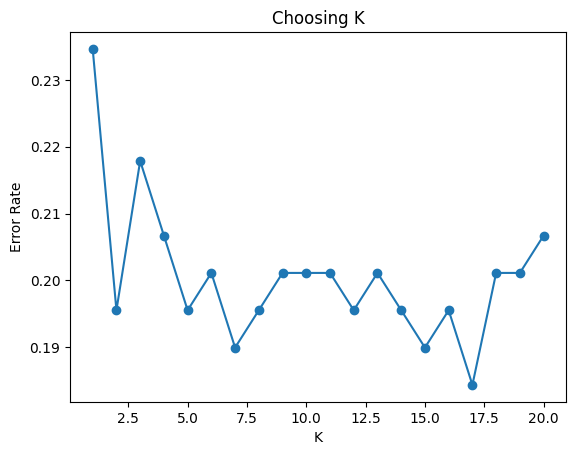

In [71]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(Y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

## Train-Test on Decission Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
decission_tree = DecisionTreeClassifier()
decission_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [78]:
predict_tree = decission_tree.predict(X_test)
print(predict_tree)

[0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1]


In [79]:
print("Accuracy Score : ", accuracy_score(Y_test, predict_tree))

Accuracy Score :  0.7821229050279329


## Visualize Tree

In [82]:
from sklearn import tree

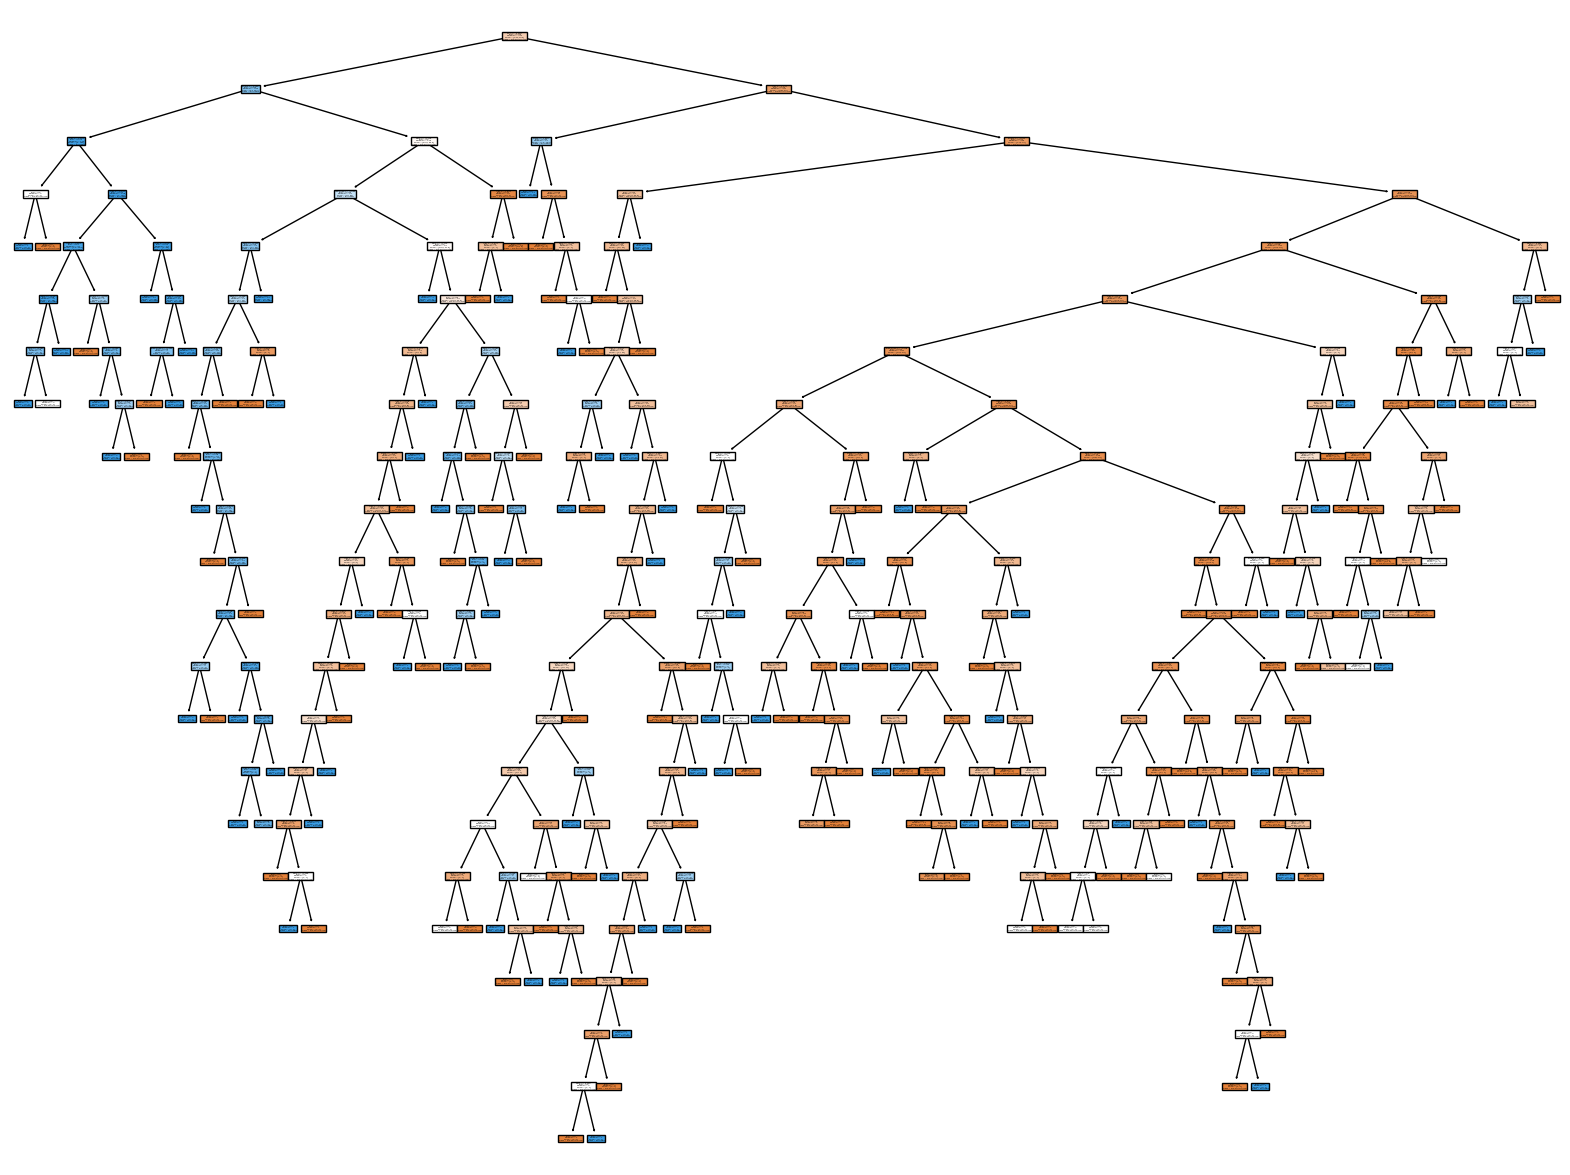

In [86]:
plt.figure(figsize=(20,15))
tree.plot_tree(decission_tree, filled=True, feature_names=X_train.columns, class_names=['Did Not Survive', 'Survived'])
plt.show()

## Train-Test on Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [89]:
predict_random = random_forest.predict(X_test)
print(predict_random)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [90]:
print("Accurecy : ", accuracy_score(Y_test, predict_random))

Accurecy :  0.8100558659217877


In [91]:
print("Classification Report : \n", classification_report(Y_test, predict_random))

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Comparison of all models.

In [92]:
models = ['Logistic Regression', 'KNN', 'Decission Tree', 'Random Forest']
accuracy = [accuracy_score(Y_test, predict_log), accuracy_score(Y_test, predict_knn), accuracy_score(Y_test, predict_tree), accuracy_score(Y_test, predict_random)]


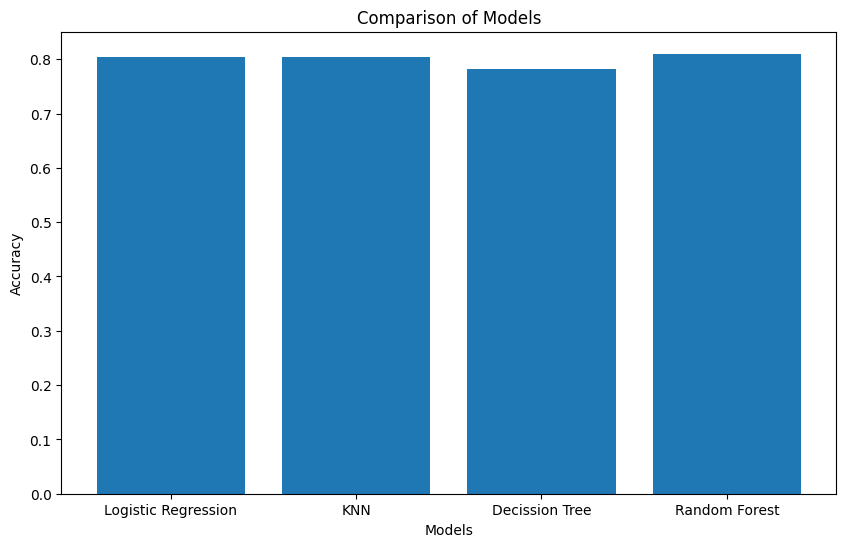

In [93]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.show()

## Summary
- Logistic Regression: Uses probability, good for linear relationships.
- KNN: Simple and intuitive, depends on neighbors.
- Decision Trees: Flowchart-style, good for interpretation.
- Random Forest: Combines trees for better accuracy, avoids overfitting.

